# **Análisis de estudiantes** 🤽

### **1. Descripción de variables a tratar**

1. ph: pH del agua (de 0 a 14).
2. Dureza: Capacidad del agua para precipitar el jabón en mg/L.
3. Sólidos: Sólidos totales disueltos en ppm.
4. Cloraminas: Cantidad de Cloraminas en ppm.
5. Sulfatos: Cantidad de Sulfatos disueltos en mg/L.
6. Conductividad: Conductividad eléctrica del agua en μS/cm.
7. Carbono_orgánico: Cantidad de carbono orgánico en ppm.
8. Trihalometanos: Cantidad de trihalometanos en μg/L.
9. Turbidez: Medida de la propiedad de emisión de luz del agua en NTU.
10. Potabilidad: Indica si el agua es segura para el consumo humano. Potable -1 y No potable -0

age	Medu	Fedu	traveltime	studytime	failures	famrel	freetime	goout	Dalc	Walc	health	absences	G1	G2	G3



### **2. Importar librerías de Python**

In [1]:
##Manipulación de datos
import pandas as pd
import numpy as np
from scipy import stats

##Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

##ignorar warnings
import warnings
warnings.simplefilter('ignore')

### **3. Incorporar el Dataset**

In [15]:
   Student = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRK_G3DWphvOVnhaJOmRm7GxV1fSU8iHk6lPSaonqLZMEYppaPhGRotMypOlHNq1lJUHzC0ly2feSLg/pub?output=csv')
   Student.head()

##Not a Number = NaN.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [16]:
Student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [17]:
## filtro para extraer solo variables numéricas
#prompt : dame un filtro para extraer las variables numéricas
est = Student.select_dtypes(include=np.number)
est.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [18]:
##Función para detectar datos inconsistentes NAN
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Columna", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

datos_NAN(Student)

Dimensiones: 395 filas, 33 columnas
Total valores NAN: 0
                          Nombre Columna Tipo Columna     #Unicos Cant Valores NAN
                                  school     object           2          0
                                     sex     object           2          0
                                     age      int64           8          0
                                 address     object           2          0
                                 famsize     object           2          0
                                 Pstatus     object           2          0
                                    Medu      int64           5          0
                                    Fedu      int64           5          0
                                    Mjob     object           5          0
                                    Fjob     object           5          0
                                  reason     object           4          0
                                gua

<Axes: >

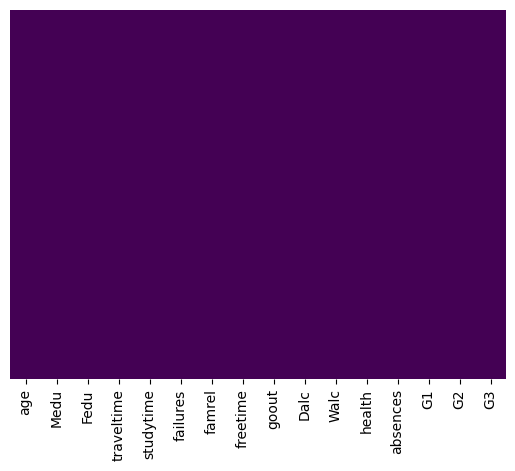

In [19]:
##Gráfica identificar datos NAN
sns.heatmap(est.isna(), yticklabels=False, cbar=False, cmap='viridis')

### **4. Multigráfica de todas las variables Densidad**

In [20]:
est.columns


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

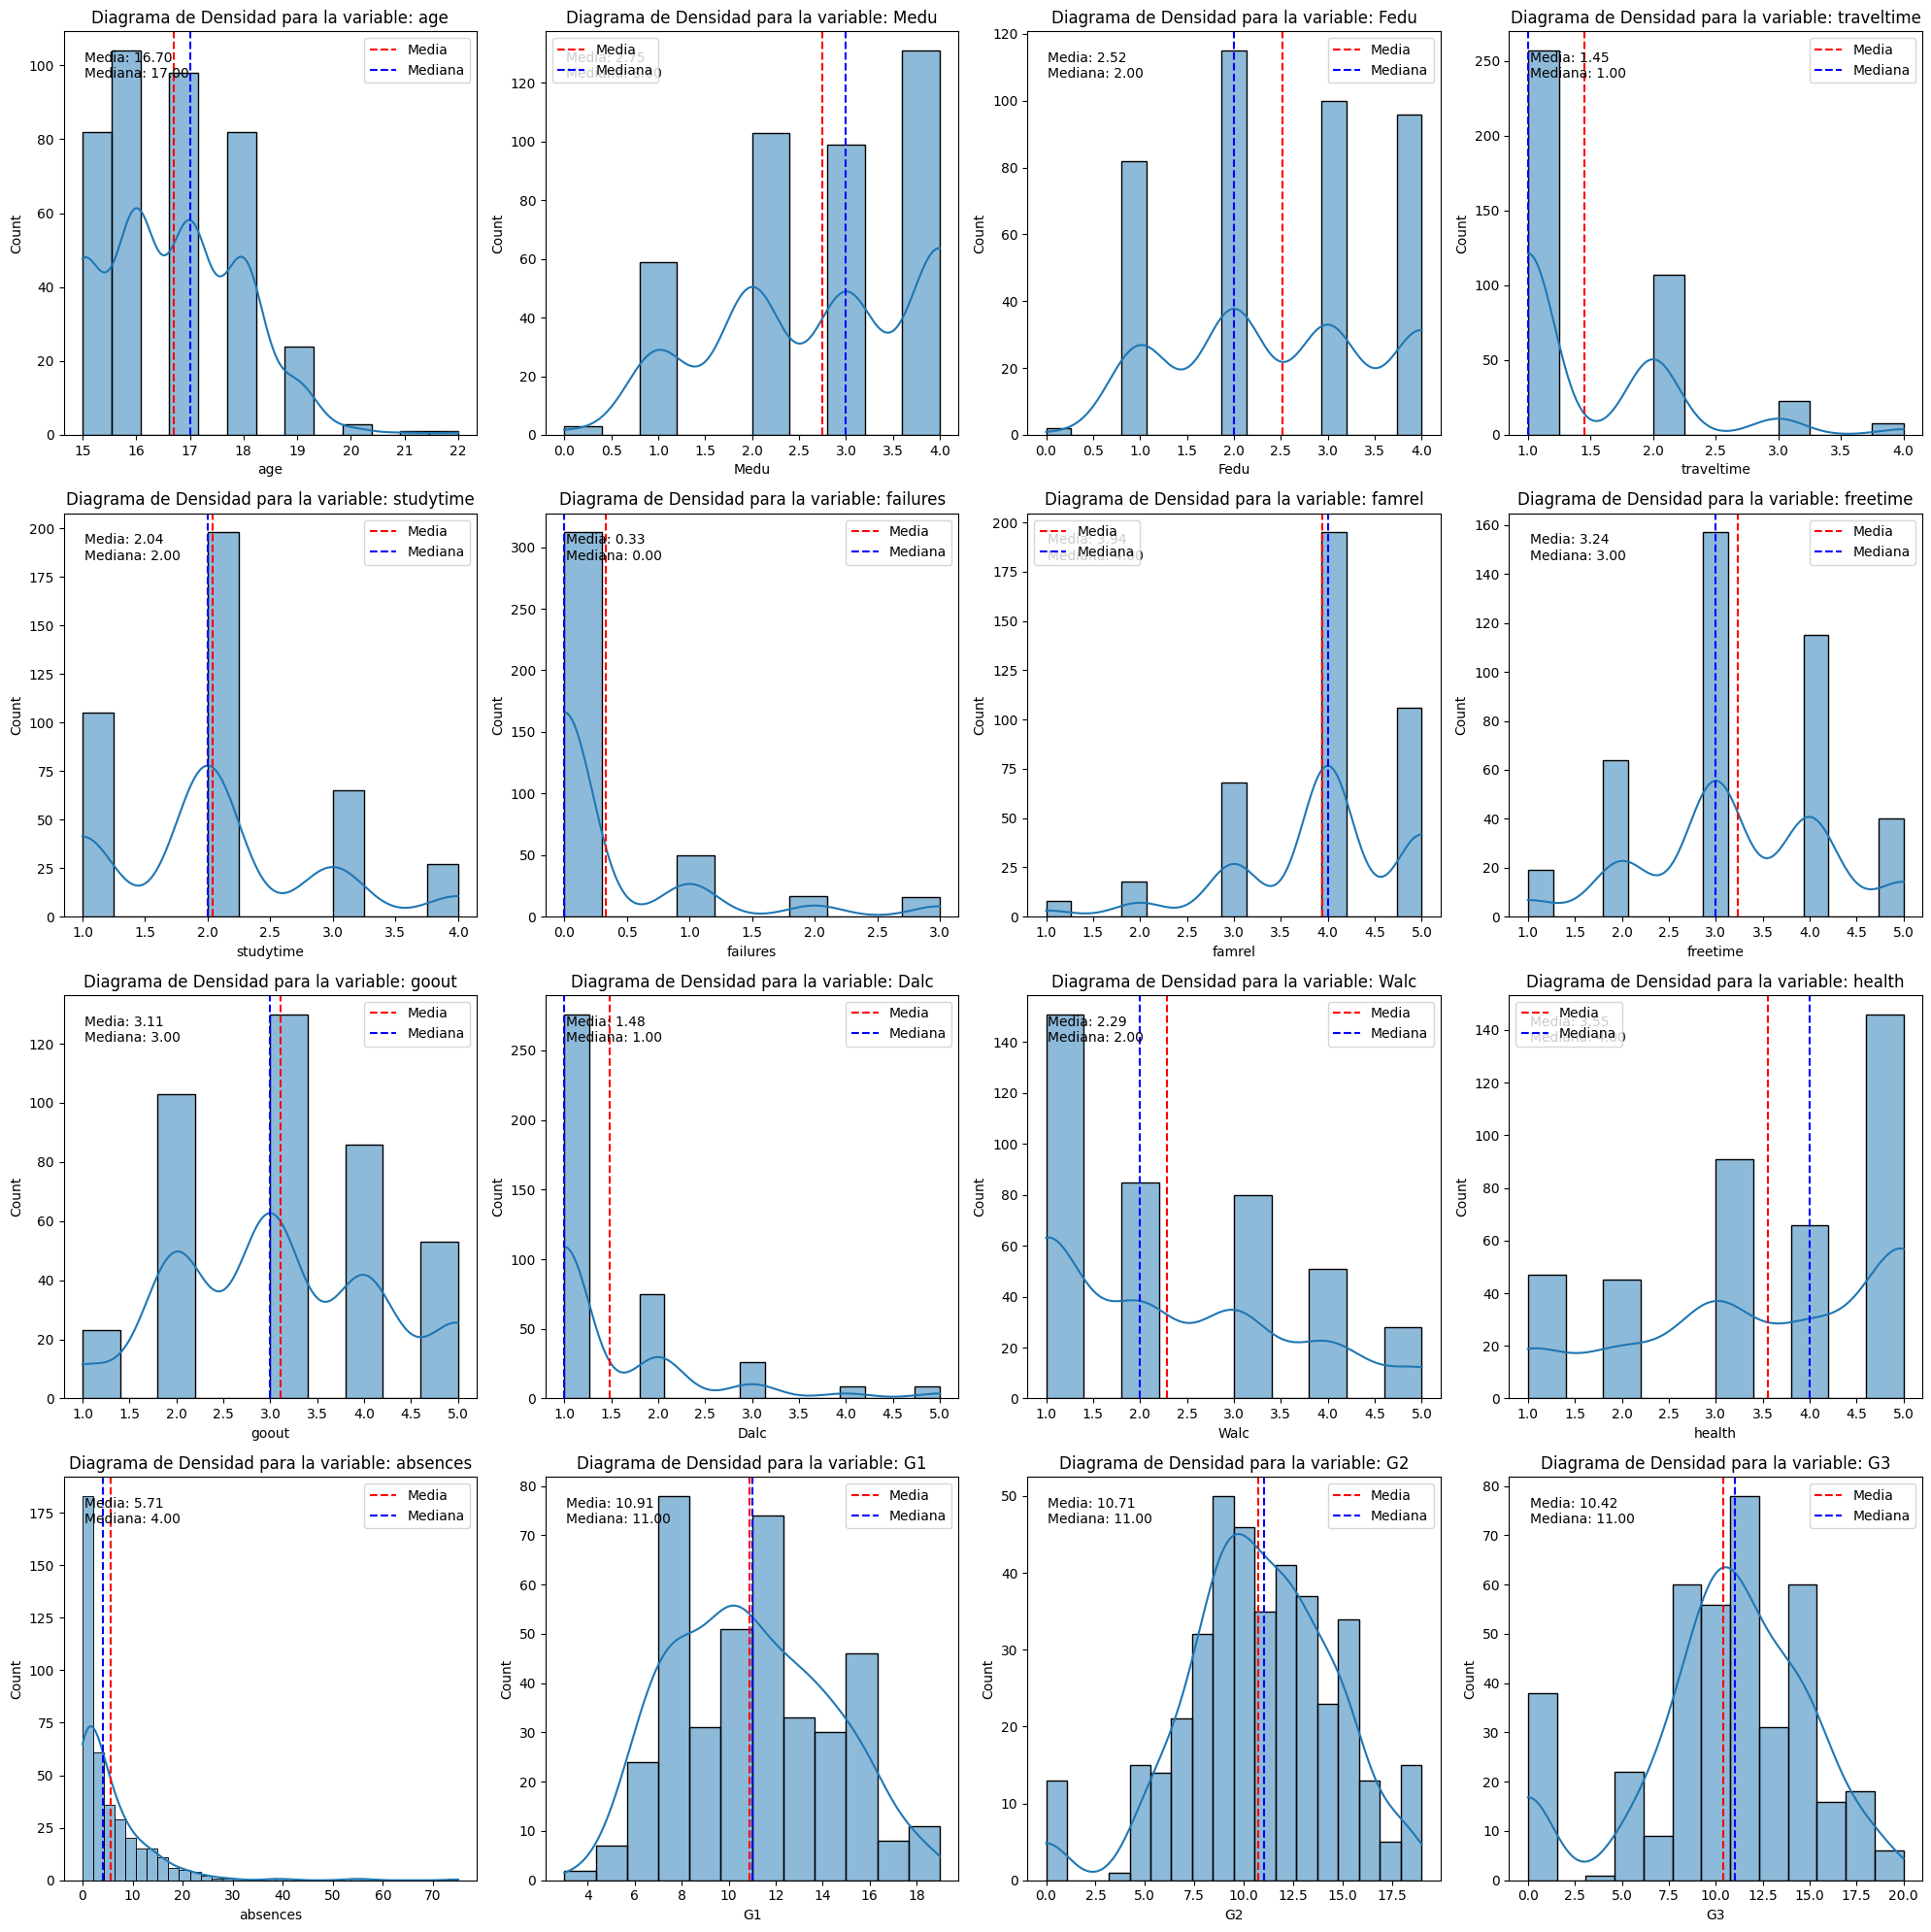

In [21]:
variables = ['age', 'Medu', 'Fedu', 'traveltime','studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

fig, axes = plt.subplots(4,4, figsize=(20,20))

axes = axes.flatten()

for i, var in enumerate(variables):
  ax = axes[i]
  sns.histplot(Student[var], kde=True, ax=ax)
  ax.axvline(Student[var].mean(), color='red', linestyle='--', label='Media')
  ax.axvline(Student[var].median(), color='blue', linestyle='--', label='Mediana')

  ax.annotate(f'Media: {Student[var].mean():.2f}\nMediana: {Student[var].median():.2f}',
              xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

  ax.set_title(f'Diagrama de Densidad para la variable: {var}')
  ax.set_xlabel(var)
  ax.legend()

plt.tight_layout()
plt.show()


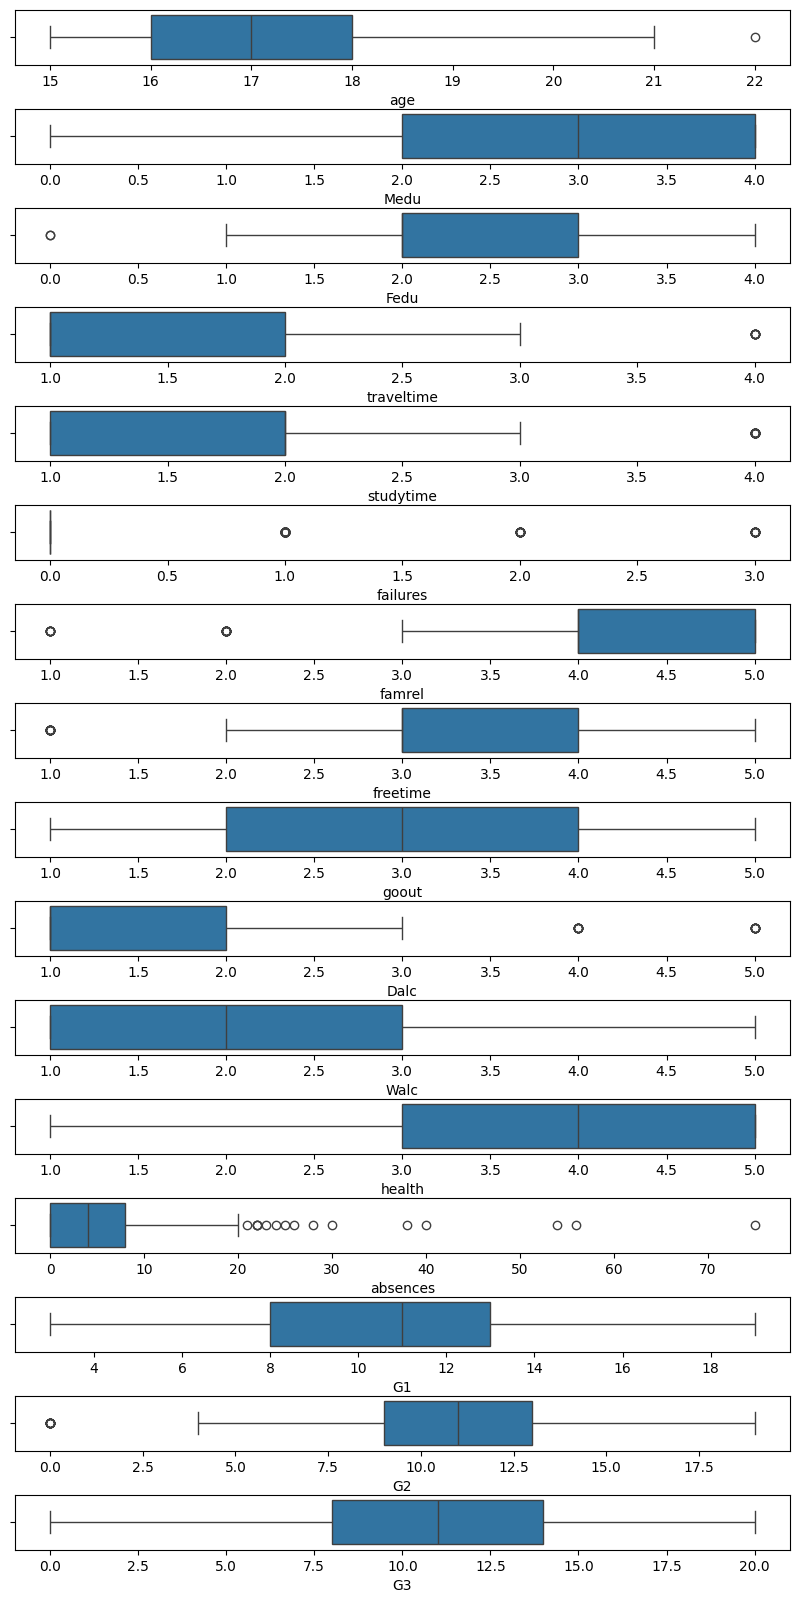

In [22]:
##Diagrama de caja
columnas = est.columns

fig, ax = plt.subplots(16,1, figsize=(10,20))
fig.subplots_adjust(hspace=0.80)
for i in range(16):
  sns.boxplot(x=columnas[i], data=est, ax=ax[i])


In [23]:
### Porcentaje de ruido en el dataframe por columna
for k,v in est.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3-q1
  v_col = v[(v <= q1 - 1.5 *iqr) |(v >= q3 + 1.5 * iqr)]
  porc = np.shape(v_col)[0]  / np.shape(est)[0]
  print('columna %s ruido= %s' % (k, porc))

columna age ruido= 0.005063291139240506
columna Medu ruido= 0.0
columna Fedu ruido= 0.005063291139240506
columna traveltime ruido= 0.020253164556962026
columna studytime ruido= 0.06835443037974684
columna failures ruido= 1.0
columna famrel ruido= 0.06582278481012659
columna freetime ruido= 0.04810126582278481
columna goout ruido= 0.0
columna Dalc ruido= 0.04556962025316456
columna Walc ruido= 0.0
columna health ruido= 0.0
columna absences ruido= 0.04810126582278481
columna G1 ruido= 0.0
columna G2 ruido= 0.04050632911392405
columna G3 ruido= 0.0


In [26]:
# Reemplazo de outliers por la mediana
df_median = est.copy()

# Definimos el umbral de outliers como aquellos valores fuera de 1.5 desviaciones estándar
for col in est .columns:
    mean = est [col].mean()
    std = est [col].std()
    outliers = (est [col] < mean - 1.5 * std) | (est [col] > mean + 1.5 * std)
    est .loc[outliers, col] = est [col].median()


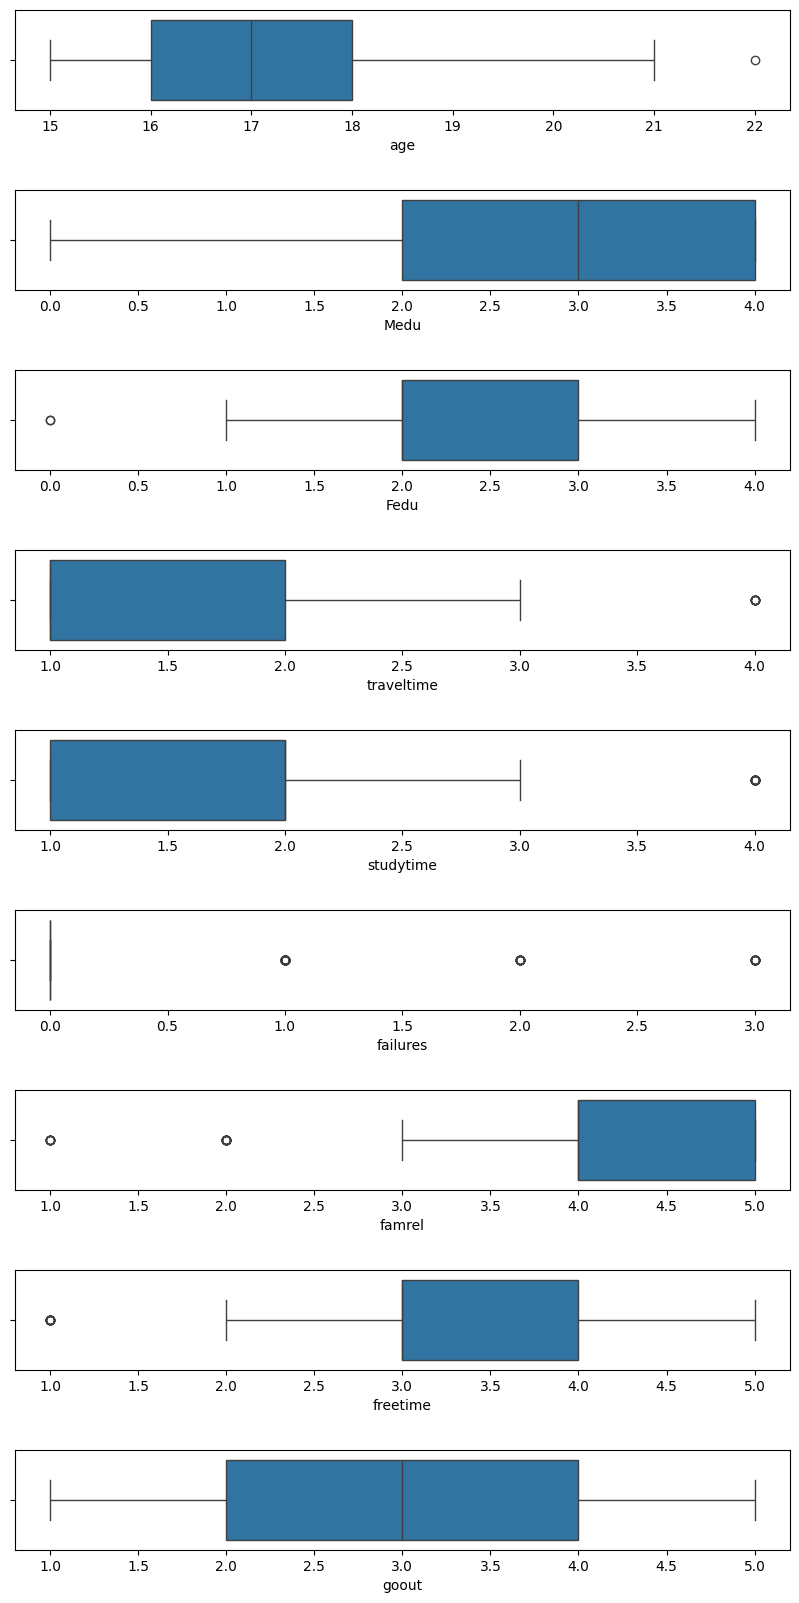

In [32]:
###Revisamos del ruido
columnas = df_median.columns
fig, ax = plt.subplots(9,1, figsize=(10,20))
fig.subplots_adjust(hspace=0.80)

for i in range(9):
  sns.boxplot(x=columnas[i], data=df_median, ax=ax[i])

In [34]:
datos_NAN(est )

Dimensiones: 395 filas, 16 columnas
Total valores NAN: 0
                          Nombre Columna Tipo Columna     #Unicos Cant Valores NAN
                                     age      int64           4          0
                                    Medu      int64           3          0
                                    Fedu      int64           4          0
                              traveltime      int64           2          0
                               studytime      int64           3          0
                                failures      int64           2          0
                                  famrel      int64           3          0
                                freetime      int64           3          0
                                   goout      int64           3          0
                                    Dalc      int64           2          0
                                    Walc      int64           4          0
                                  h

In [37]:
###Función para revisar ruido
for k,v in est .items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3-q1
  v_col = v[(v <= q1 - 1.5 *iqr) |(v >= q3 + 1.5 * iqr)]
  porc = np.shape(v_col)[0]  / np.shape(est )[0]
  print('Columna %s Ruido= %s' % (k, porc))

Columna age Ruido= 0.0
Columna Medu Ruido= 0.0
Columna Fedu Ruido= 0.0
Columna traveltime Ruido= 0.0
Columna studytime Ruido= 0.0
Columna failures Ruido= 1.0
Columna famrel Ruido= 0.0
Columna freetime Ruido= 0.0
Columna goout Ruido= 0.0
Columna Dalc Ruido= 1.0
Columna Walc Ruido= 0.0
Columna health Ruido= 0.0
Columna absences Ruido= 0.027848101265822784
Columna G1 Ruido= 0.0
Columna G2 Ruido= 0.0
Columna G3 Ruido= 0.020253164556962026


### **5. Otra estrategia**

In [38]:
est.isna().sum()

,0
age,0
Medu,0
Fedu,0
traveltime,0
studytime,0
failures,0
famrel,0
freetime,0
goout,0
Dalc,0


### **6. Normalización**

In [39]:
est.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.529114,1.040323,15.0,16.0,17.0,17.0,18.0
Medu,395.0,3.070886,0.767379,2.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.531646,1.073864,1.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.270886,0.444981,1.0,1.0,1.0,2.0,2.0
studytime,395.0,1.898734,0.648993,1.0,1.0,2.0,2.0,3.0
failures,395.0,0.126582,0.332926,0.0,0.0,0.0,0.0,1.0
famrel,395.0,4.096203,0.657530,3.0,4.0,4.0,5.0,5.0
freetime,395.0,3.129114,0.661515,2.0,3.0,3.0,4.0,4.0
goout,395.0,2.956962,0.691259,2.0,2.0,3.0,3.0,4.0
Dalc,395.0,1.189873,0.392698,1.0,1.0,1.0,1.0,2.0


In [40]:
##https://www.linkedin.com/pulse/standardization-normalization-regularization-nikita-sharma-jauvf#:~:text=Standardization%20and%20Normalization%20are%20data,doesn%27t%20affect%20the%20data.

from sklearn.preprocessing import MinMaxScaler
def normaData(df):
    valores = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

estnorma = normaData(est)

estnorma.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,0.509705,0.346774,0.0,0.333333,0.666667,0.666667,1.0
Medu,395.0,0.535443,0.383690,0.0,0.000000,0.500000,1.000000,1.0
Fedu,395.0,0.510549,0.357955,0.0,0.333333,0.333333,0.666667,1.0
traveltime,395.0,0.270886,0.444981,0.0,0.000000,0.000000,1.000000,1.0
studytime,395.0,0.449367,0.324496,0.0,0.000000,0.500000,0.500000,1.0
failures,395.0,0.126582,0.332926,0.0,0.000000,0.000000,0.000000,1.0
famrel,395.0,0.548101,0.328765,0.0,0.500000,0.500000,1.000000,1.0
freetime,395.0,0.564557,0.330757,0.0,0.500000,0.500000,1.000000,1.0
goout,395.0,0.478481,0.345629,0.0,0.000000,0.500000,0.500000,1.0
Dalc,395.0,0.189873,0.392698,0.0,0.000000,0.000000,0.000000,1.0


### **7. Test de Normalidad**

In [41]:
##D'agostino, shapiro-wilk, jarque-bera, kolmogorov - smirnov , anderson-darling.
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

testShapiroWilk(est)

,Variable,Valores P,Concepto
0,age,1.535960e-17,No es una variable Normal
1,Medu,1.771643e-21,No es una variable Normal
2,Fedu,5.962465e-18,No es una variable Normal
3,traveltime,1.943232e-30,No es una variable Normal
4,studytime,2.919290e-22,No es una variable Normal
5,failures,2.603811e-34,No es una variable Normal
6,famrel,4.302221e-22,No es una variable Normal
7,freetime,4.274818e-22,No es una variable Normal
8,goout,1.596306e-21,No es una variable Normal
9,Dalc,2.298041e-32,No es una variable Normal


In [42]:
##https://i.ytimg.com/vi/LJ_zm8Pqe_Y/maxresdefault.jpg
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

testShapiroWilk(estnorma)

,Variable,Valores P,Concepto
0,age,1.535960e-17,No es una variable Normal
1,Medu,1.771643e-21,No es una variable Normal
2,Fedu,5.962465e-18,No es una variable Normal
3,traveltime,1.943232e-30,No es una variable Normal
4,studytime,2.919290e-22,No es una variable Normal
5,failures,2.603811e-34,No es una variable Normal
6,famrel,4.302221e-22,No es una variable Normal
7,freetime,4.274818e-22,No es una variable Normal
8,goout,1.596306e-21,No es una variable Normal
9,Dalc,2.298041e-32,No es una variable Normal


### **8. Correlación**

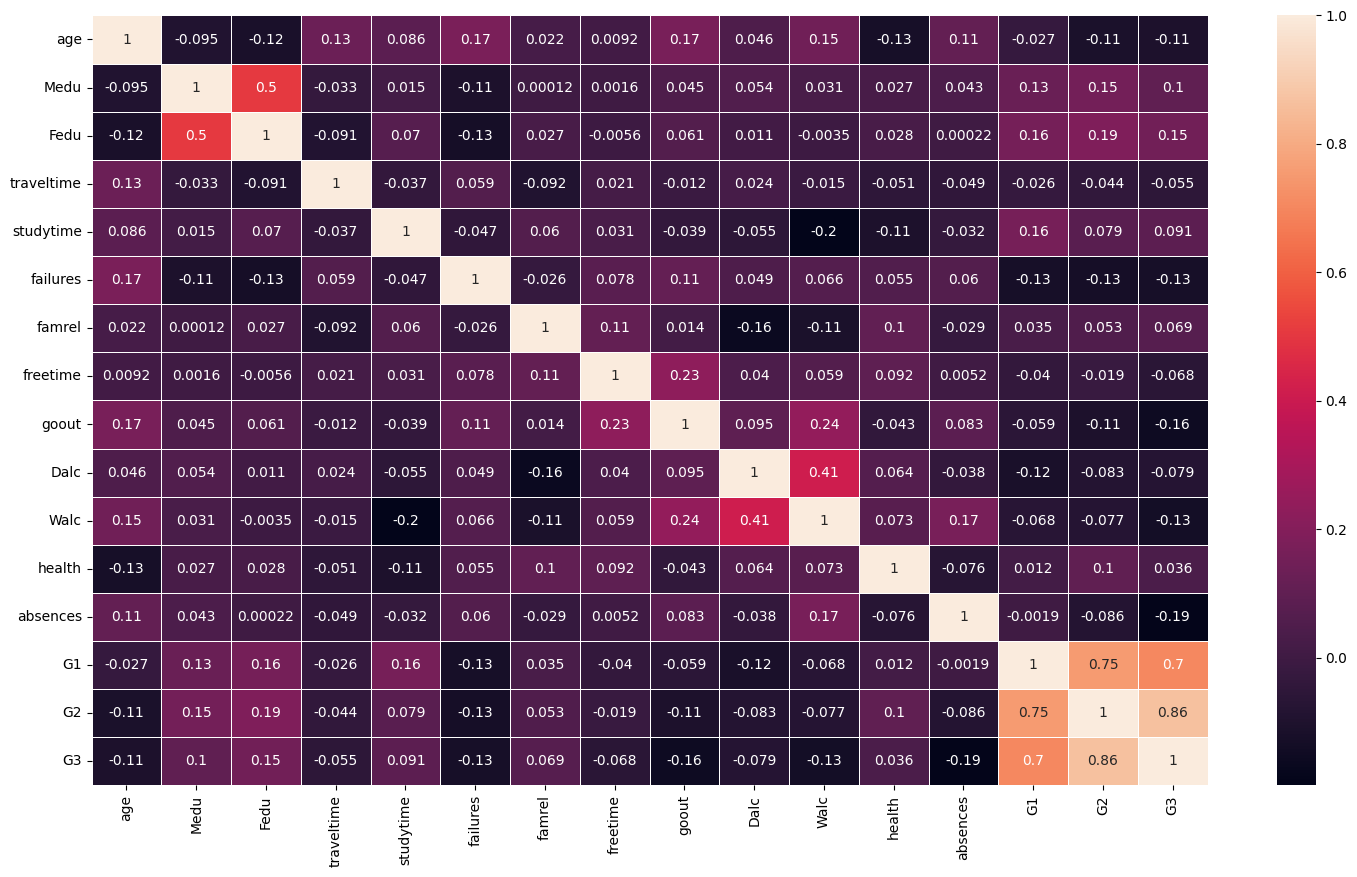

In [43]:
##La correlación es que tan estrecha esta una variable relacionada con otra,
#como puede una variable o varias definir otra; no es causalidad. -1 a 1.
def DiagCorr(df, tamuno, tamdos):
    f, ax = plt.subplots(figsize=(tamuno,tamdos))
    sns.heatmap(df.corr(method="spearman"), annot=True, linewidths=.5, ax=ax)

DiagCorr(estnorma, 18,10)

Pregunta de Investigación:
1. Cuales variables son las mas importantes para clasificar la potabilidad del agua siendo 1- potable y 0 - no potable?

2. Cuáles algoritmos son los mejores para poder clasificar la potabilidad del agua?

3. Cuál es la eficiencia de un modelo de clasificación para predecir la potabilidad del agua?

4. Qué estrategia se puede implementar para contribuir a la mejor captura de los datos y poder predecir la potabilidad de agua. - Gobierno de datos / Calidad

https://archive.ics.uci.edu/dataset/320/student+performance

In [45]:
estcat = Student.select_dtypes(include=['object'])
estcat

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


### **9. Homoscedasticidad y Multicolinealidad**

La homocedasticidad es un supuesto importante en muchos modelos de regresión, como la regresión lineal. Se refiere a la condición en la que la varianza de los errores (residuos) es constante a lo largo de todos los valores de las variables independientes. En otras palabras, los residuos no deberían mostrar un patrón en función de los valores de las predicciones.
¿Para qué sirve?

El supuesto de homocedasticidad es crucial para la validez de la inferencia en modelos de regresión. Si este supuesto se viola (es decir, si hay heterocedasticidad), las estimaciones de los coeficientes de la regresión siguen siendo imparciales, pero las pruebas de significancia (como los valores p) y los intervalos de confianza pueden ser incorrectos, lo que afecta la validez del modelo.

In [46]:
import statsmodels.api as sm

# Definir las variables independientes y la variable dependiente
X = CaguaNorm[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = CaguaNorm['Conductivity']

# Añadir una constante a las variables independientes para el intercepto
X_with_const = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X_with_const).fit()

# Obtener los valores ajustados (predicciones) y los residuos
fitted_vals = model.fittedvalues
residuals = model.resid

# Mostrar el resumen del modelo (opcional)
print(model.summary())

NameError: name 'CaguaNorm' is not defined

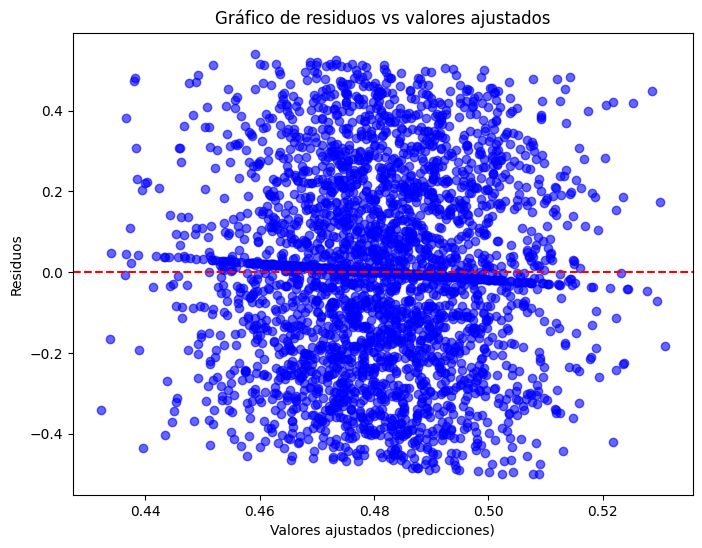

In [ ]:
# Gráfico de residuos vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de residuos vs valores ajustados')
plt.xlabel('Valores ajustados (predicciones)')
plt.ylabel('Residuos')
plt.show()

In [47]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Prueba de Breusch-Pagan para homocedasticidad
test_results = het_breuschpagan(residuals, X_with_const)

# El resultado devuelve cuatro valores: Lagrange multiplier statistic, p-value, f-value, f p-value
labels = ['Lagrange Multiplier Statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, test_results)))


NameError: name 'residuals' is not defined

1. El valor p te indica si puedes rechazar la hipótesis nula de homocedasticidad.
2. Si el valor p es menor que 0.05, indica que hay heterocedasticidad.
3. Si el valor p es mayor que 0.05, no hay evidencia suficiente para rechazar la homocedasticidad.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns

# El VIF se calcula usando el variance_inflation_factor de statsmodels
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Mostrar los resultados de VIF
print(vif_data)

          Variable        VIF
0            const  44.544904
1               ph   1.011067
2         Hardness   1.012364
3           Solids   1.010493
4      Chloramines   1.004153
5          Sulfate   1.010120
6   Organic_carbon   1.001980
7  Trihalomethanes   1.002398
8        Turbidity   1.008181


Interpretación de los resultados de VIF:

    1. Un VIF de 1 significa que no hay multicolinealidad entre esa variable y las demás.
    2. Un VIF entre 1 y 5 indica niveles aceptables de multicolinealidad.
    3. Un VIF mayor a 5 indica una multicolinealidad alta, lo que puede ser problemático para el modelo. (sqrt , logn)

### **10. Introducción a Regresión Lineal Simple**

In [ ]:
##60% train 40% test - 70% train 30% test - 80% train 20% -90% train 10% test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##Seleccionar las variables

X = CaguaNorm[['Chloramines']]
y = CaguaNorm['Conductivity']

##Particionar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40, random_state=42)

##crear el modelo
modelouno = LinearRegression()
modelouno.fit(X_train, y_train)

##Predicciones
y_pred = modelouno.predict(X_test)

##Metricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

##Calculo del R^2
r2 = round(r2_score(y_test, y_pred),3)

##Imprimir los resultados
print('Mean Squared Error (MSE)', mse)
print('Root Mean Squared Error (RMSE)', rmse)
print('R^2 Score:', r2)

Mean Squared Error (MSE) 0.056727142069404546
Root Mean Squared Error (RMSE) 0.23817460416552505
R^2 Score: 0.0


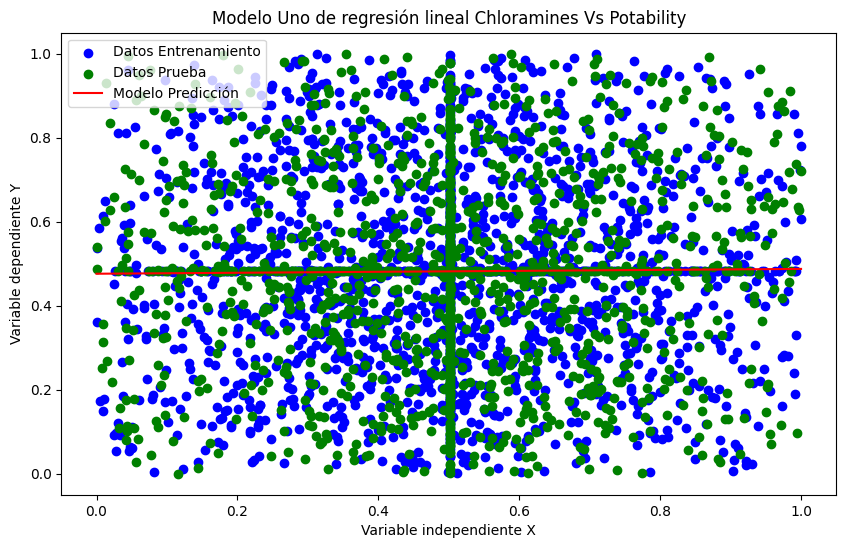

In [ ]:
##Grafica del modelo
X_range = pd.DataFrame(np.linspace(X.min(), X.max(),100))
y_pred = modelouno.predict(X_range)

plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='blue', label='Datos Entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos Prueba')
plt.plot(X_range, y_pred, color='red', label='Modelo Predicción')
plt.title('Modelo Uno de regresión lineal Chloramines Vs Potability')
plt.xlabel('Variable independiente X')
plt.ylabel('Variable dependiente Y')
plt.legend()

### **11. Introducción a Regresión Lineal Múltiple**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##Seleccionar las variables

X = CaguaNorm[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = CaguaNorm['Conductivity']

##Particionar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

##crear el modelo
modelouno = LinearRegression()
modelouno.fit(X_train, y_train)

##Predicciones
y_pred = modelouno.predict(X_test)

##Metricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

##Calculo del R^2
r2 = round(r2_score(y_test, y_pred),3)

##Imprimir los resultados
print('Mean Squared Error (MSE)', mse)
print('Root Mean Squared Error (RMSE)', rmse)
print('R^2 Score:', r2)

Mean Squared Error (MSE) 0.05850940123619243
Root Mean Squared Error (RMSE) 0.24188716633214014
R^2 Score: -0.015


### **12. Ejemplo data del taller**

In [ ]:
mediciones = pd.read_excel('/content/drive/MyDrive/DATOS/mediciones.xlsx')

mediciones.head()

,fecha,hora,temambiente,tempestanque,oxigenod,ph,cond,nh3,nh4,nitrito,alcalinidad
0,2019-11-12,8:00am,24,26.7,0.9,7.04,159,0.57,7.3,6,71
1,2019-11-12,5:00pm,28,27.2,4.8,7.66,145,0.35,5.1,7,68
2,2019-11-13,8:00am,21,26.0,2.4,7.24,158,0.56,8.4,7,73
3,2019-11-13,5:00pm,27,26.6,3.7,7.33,195,0.50,7.9,11,73
4,2019-11-14,8:00am,28,26.0,0.7,7.13,188,0.65,10.7,4,59


In [ ]:
###Revisar los datos NAN
datos_NAN(mediciones)

Dimensiones: 70 filas, 11 columnas
Total valores NAN: 0
                          Nombre Columna Tipo Columna     #Unicos Cant Valores NAN
                                   fecha datetime64[ns]          35          0
                                    hora     object           2          0
                             temambiente      int64          15          0
                            tempestanque    float64          32          0
                                oxigenod    float64          39          0
                                      ph    float64          53          0
                                    cond      int64          37          0
                                     nh3    float64          49          0
                                     nh4    float64          53          0
                                 nitrito      int64          10          0
                             alcalinidad      int64          26          0


In [ ]:
##creación dataframe mediciones 2
medicionesdos = mediciones.copy()

medicionesdos.head()

,fecha,hora,temambiente,tempestanque,oxigenod,ph,cond,nh3,nh4,nitrito,alcalinidad
0,2019-11-12,8:00am,24,26.7,0.9,7.04,159,0.57,7.3,6,71
1,2019-11-12,5:00pm,28,27.2,4.8,7.66,145,0.35,5.1,7,68
2,2019-11-13,8:00am,21,26.0,2.4,7.24,158,0.56,8.4,7,73
3,2019-11-13,5:00pm,27,26.6,3.7,7.33,195,0.50,7.9,11,73
4,2019-11-14,8:00am,28,26.0,0.7,7.13,188,0.65,10.7,4,59


In [ ]:
##Quitar fecha y hora
nuevamedicion = medicionesdos.drop(['fecha', 'hora'], axis=1)
nuevamedicion.head()

,temambiente,tempestanque,oxigenod,ph,cond,nh3,nh4,nitrito,alcalinidad
0,24,26.7,0.9,7.04,159,0.57,7.3,6,71
1,28,27.2,4.8,7.66,145,0.35,5.1,7,68
2,21,26.0,2.4,7.24,158,0.56,8.4,7,73
3,27,26.6,3.7,7.33,195,0.50,7.9,11,73
4,28,26.0,0.7,7.13,188,0.65,10.7,4,59


In [ ]:
###Estadísticas generales
nuevamedicion.describe().T

,count,mean,std,min,25%,50%,75%,max
temambiente,70.0,27.757143,4.206399,21.0,24.000,27.50,32.0000,35.00
tempestanque,70.0,26.577143,0.923474,24.2,26.200,26.80,27.1750,28.20
oxigenod,70.0,2.738143,1.971291,0.7,1.300,1.95,3.5500,8.20
ph,70.0,7.206143,0.356888,6.2,7.000,7.15,7.4025,8.10
cond,70.0,151.585714,19.084475,111.0,144.250,152.00,155.0000,246.00
nh3,70.0,0.366000,0.230591,0.0,0.165,0.36,0.5300,0.98
nh4,70.0,4.514286,3.042324,0.2,1.825,3.85,7.2500,11.10
nitrito,70.0,4.557143,2.381302,0.0,3.000,4.50,6.0000,11.00
alcalinidad,70.0,68.471429,7.314313,47.0,65.250,71.00,73.0000,80.00


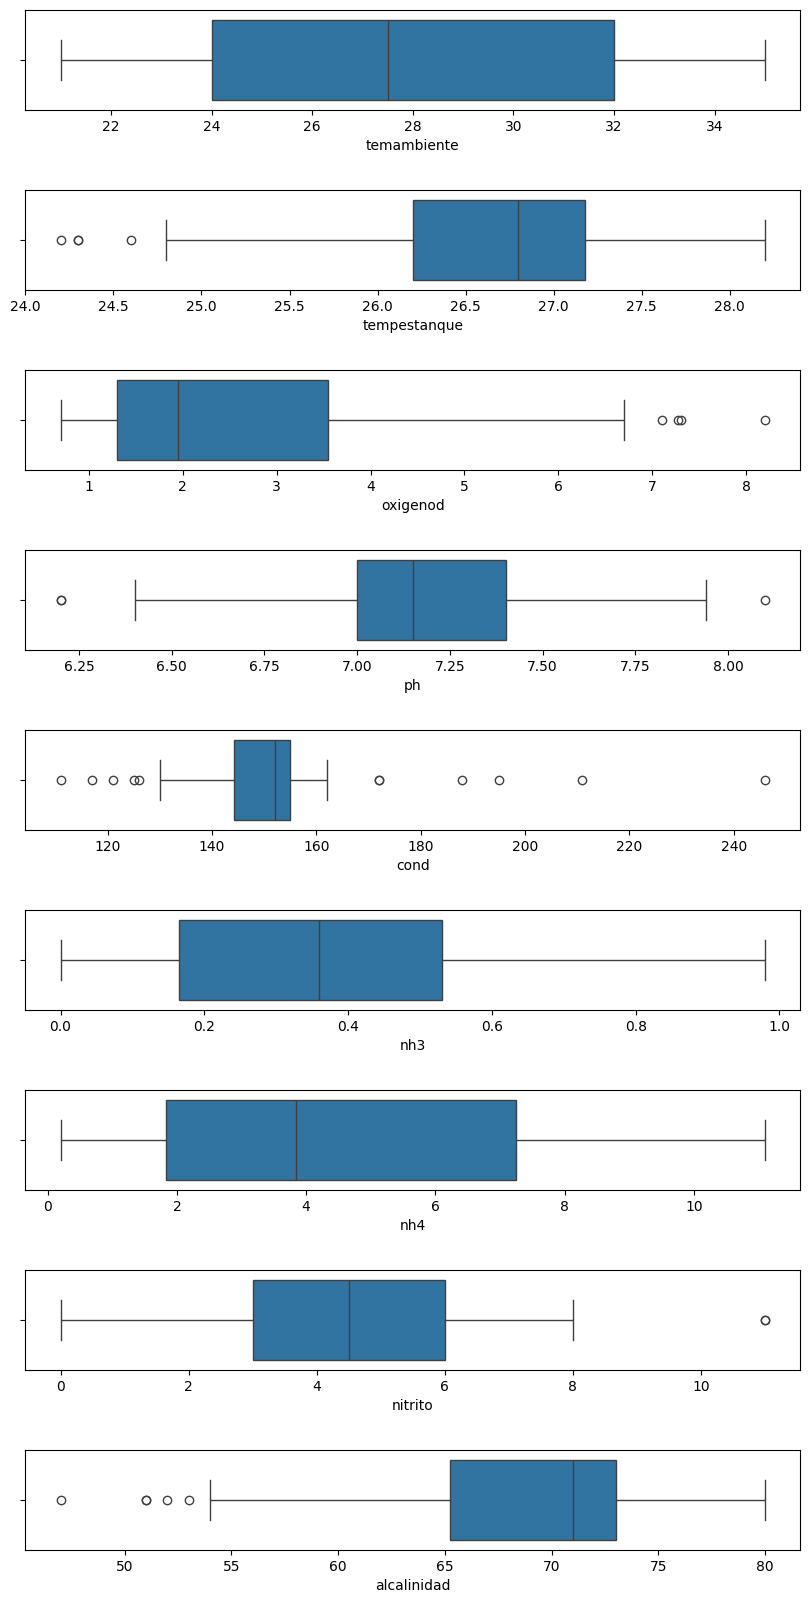

In [ ]:
columnas = nuevamedicion.columns

fig, ax = plt.subplots(9,1, figsize=(10,20))
fig.subplots_adjust(hspace=0.80)
for i in range(9):
  sns.boxplot(x=columnas[i], data=nuevamedicion, ax=ax[i])

In [ ]:
###Función para revisar ruido
for k,v in nuevamedicion.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3-q1
  v_col = v[(v <= q1 - 1.5 *iqr) |(v >= q3 + 1.5 * iqr)]
  porc = np.shape(v_col)[0] * 100 / np.shape(nuevamedicion)[0]
  print('Columna %s Ruido= %s' % (k, porc))

Columna temambiente Ruido= 0.0
Columna tempestanque Ruido= 5.714285714285714
Columna oxigenod Ruido= 5.714285714285714
Columna ph Ruido= 4.285714285714286
Columna cond Ruido= 15.714285714285714
Columna nh3 Ruido= 0.0
Columna nh4 Ruido= 0.0
Columna nitrito Ruido= 2.857142857142857
Columna alcalinidad Ruido= 7.142857142857143


In [ ]:
##Limpieza de ruido
# Definimos el umbral de outliers como aquellos valores fuera de 1.5 desviaciones estándar
nuevamedicion2 = nuevamedicion.copy()

for col in nuevamedicion2.columns:
    mean = nuevamedicion2[col].mean()
    std = nuevamedicion2[col].std()
    outliers = (nuevamedicion2[col] < mean - 1.5 * std) | (nuevamedicion2[col] > mean + 1.5 * std)
    nuevamedicion2.loc[outliers, col] = nuevamedicion2[col].median()

In [ ]:
for k,v in nuevamedicion2.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3-q1
  v_col = v[(v <= q1 - 1.5 *iqr) |(v >= q3 + 1.5 * iqr)]
  porc = np.shape(v_col)[0] * 100 / np.shape(nuevamedicion2)[0]
  print('Columna %s Ruido= %s' % (k, porc))

Columna temambiente Ruido= 0.0
Columna tempestanque Ruido= 2.857142857142857
Columna oxigenod Ruido= 10.0
Columna ph Ruido= 0.0
Columna cond Ruido= 15.714285714285714
Columna nh3 Ruido= 0.0
Columna nh4 Ruido= 0.0
Columna nitrito Ruido= 0.0
Columna alcalinidad Ruido= 7.142857142857143


### **13. Multigráfica con ruido**

In [ ]:
nuevamedicion.columns

Index(['temambiente', 'tempestanque', 'oxigenod', 'ph', 'cond', 'nh3', 'nh4',
       'nitrito', 'alcalinidad'],
      dtype='object')

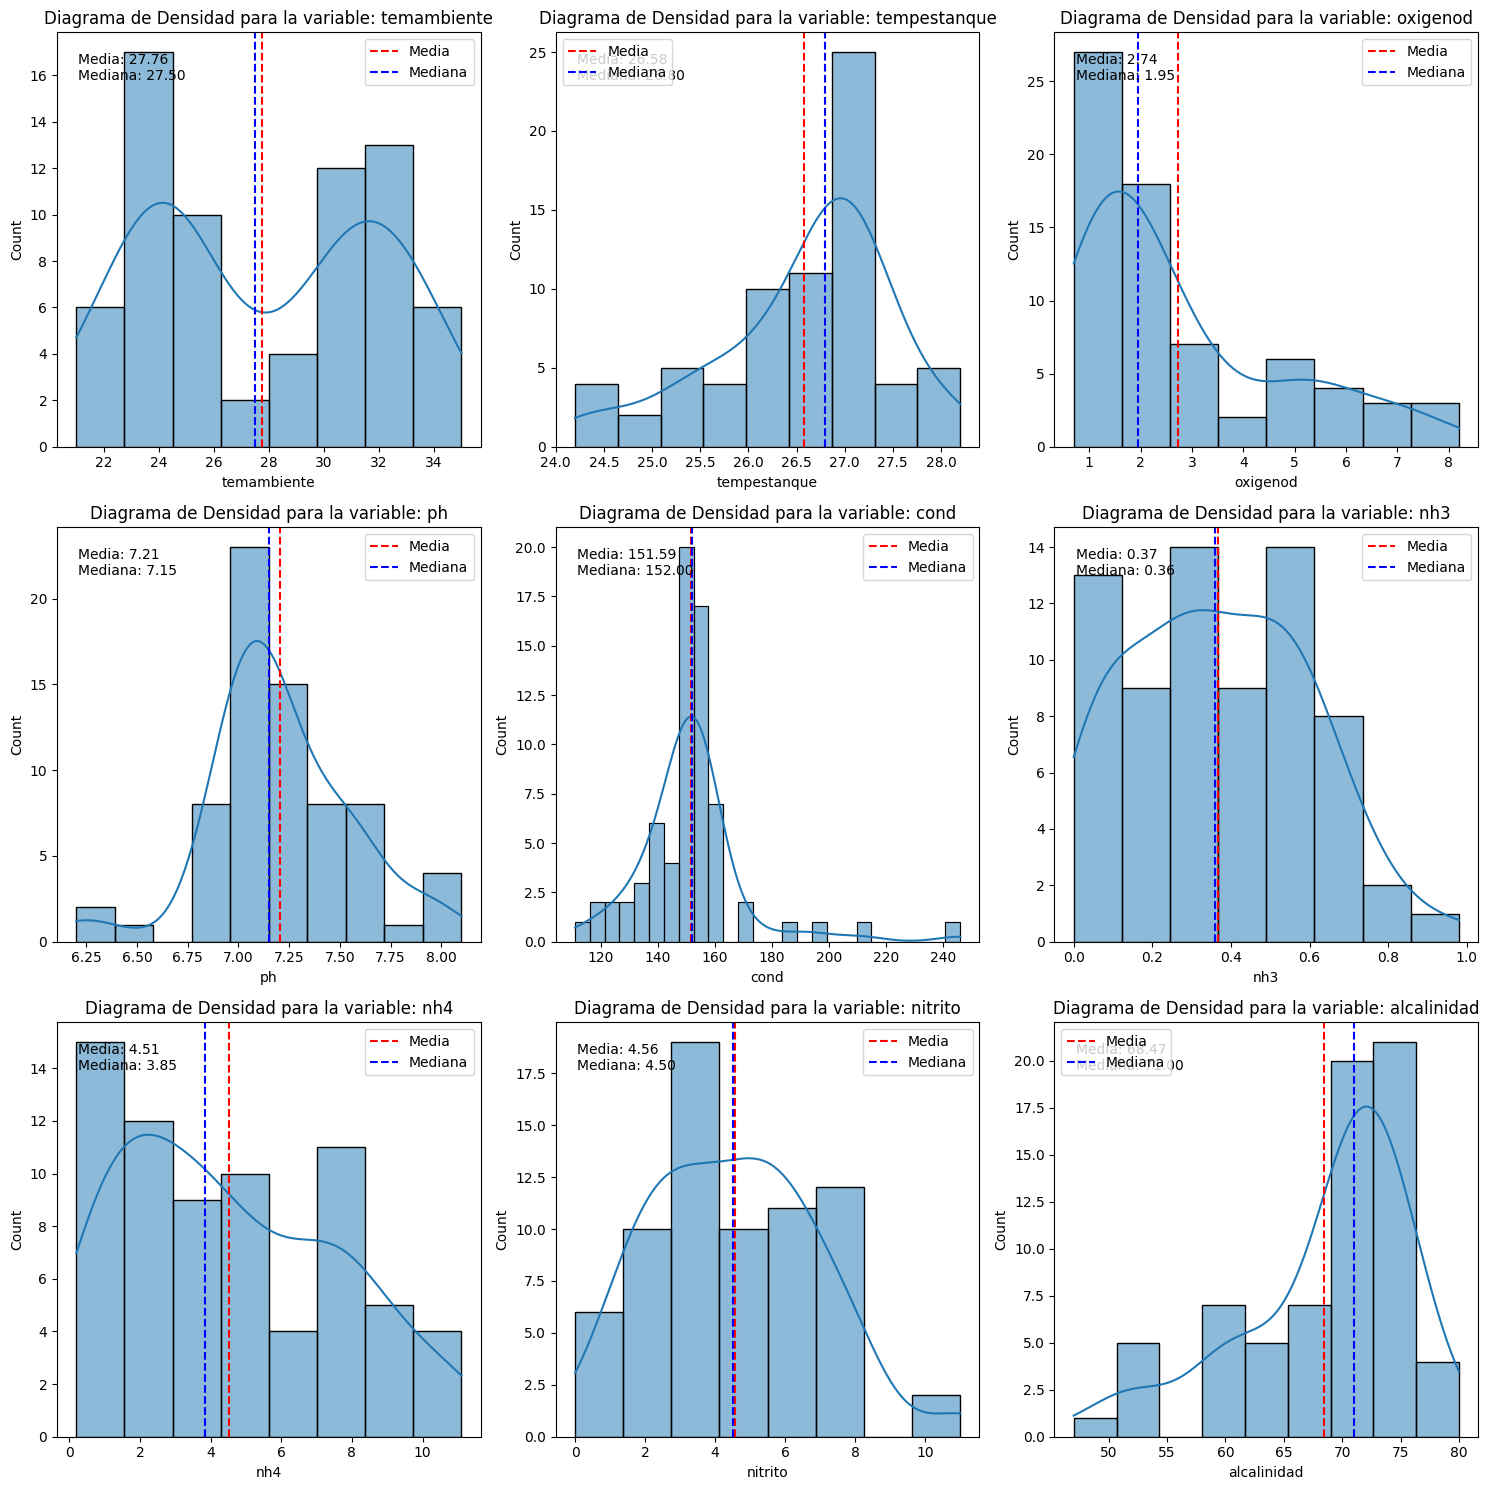

In [ ]:
variables = ['temambiente', 'tempestanque', 'oxigenod', 'ph', 'cond', 'nh3', 'nh4',
       'nitrito', 'alcalinidad']

fig, axes = plt.subplots(3,3, figsize=(15,15))

axes = axes.flatten()

for i, var in enumerate(variables):
  ax = axes[i]
  sns.histplot(nuevamedicion[var], kde=True, ax=ax)
  ax.axvline(nuevamedicion[var].mean(), color='red', linestyle='--', label='Media')
  ax.axvline(nuevamedicion[var].median(), color='blue', linestyle='--', label='Mediana')

  ax.annotate(f'Media: {nuevamedicion[var].mean():.2f}\nMediana: {nuevamedicion[var].median():.2f}',
              xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

  ax.set_title(f'Diagrama de Densidad para la variable: {var}')
  ax.set_xlabel(var)
  ax.legend()

plt.tight_layout()
plt.show()

###  **14. Multigráfica sin ruido**

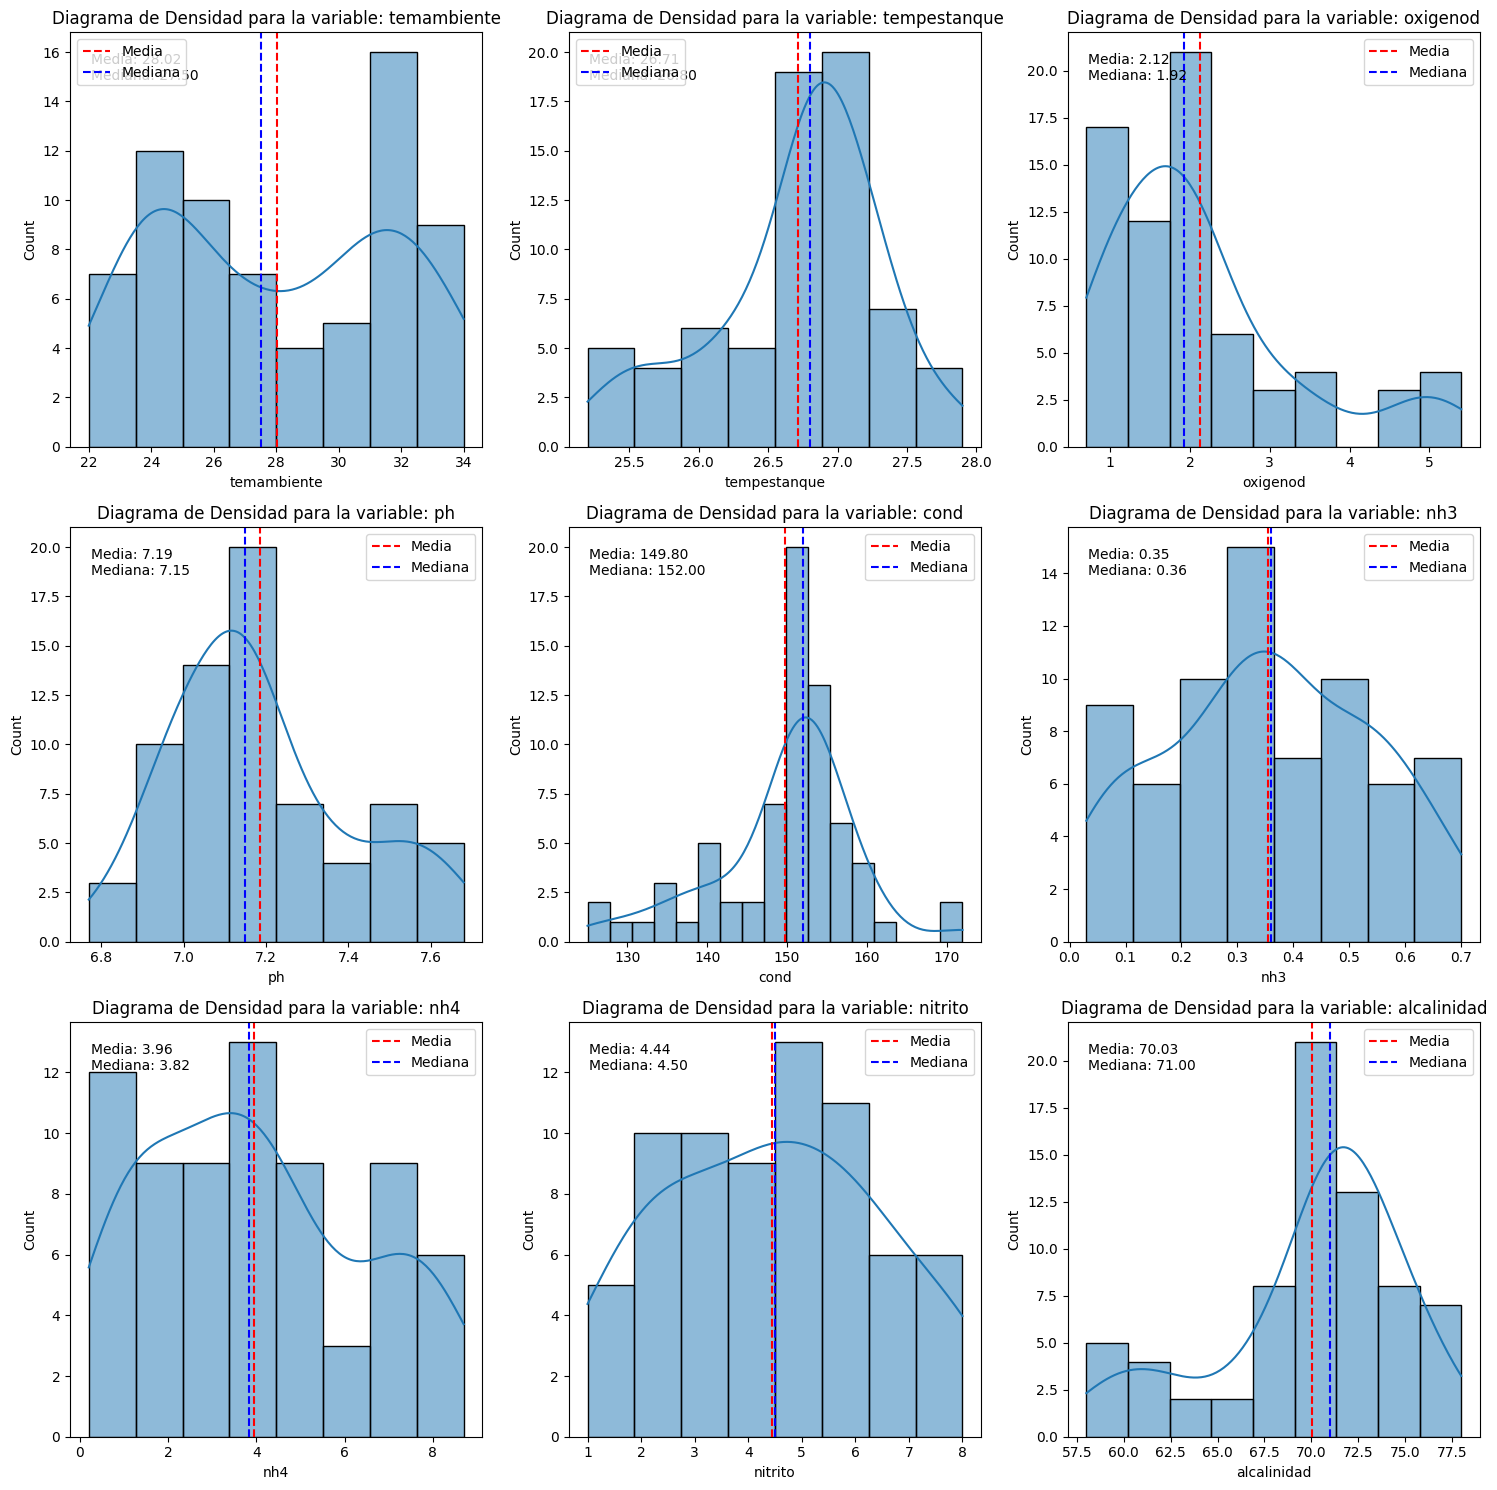

In [ ]:
variables = ['temambiente', 'tempestanque', 'oxigenod', 'ph', 'cond', 'nh3', 'nh4',
       'nitrito', 'alcalinidad']

fig, axes = plt.subplots(3,3, figsize=(15,15))

axes = axes.flatten()

for i, var in enumerate(variables):
  ax = axes[i]
  sns.histplot(nuevamedicion2[var], kde=True, ax=ax)
  ax.axvline(nuevamedicion2[var].mean(), color='red', linestyle='--', label='Media')
  ax.axvline(nuevamedicion2[var].median(), color='blue', linestyle='--', label='Mediana')

  ax.annotate(f'Media: {nuevamedicion2[var].mean():.2f}\nMediana: {nuevamedicion2[var].median():.2f}',
              xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

  ax.set_title(f'Diagrama de Densidad para la variable: {var}')
  ax.set_xlabel(var)
  ax.legend()

plt.tight_layout()
plt.show()

### **15. Test de Normalidad ruido**

In [ ]:
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

testShapiroWilk(nuevamedicion)

,Variable,Valores P,Concepto
0,temambiente,1.149716e-04,No es una variable Normal
1,tempestanque,1.316826e-03,No es una variable Normal
2,oxigenod,3.993682e-07,No es una variable Normal
3,ph,6.101242e-03,No es una variable Normal
4,cond,1.287634e-08,No es una variable Normal
5,nh3,9.822458e-02,Es una variable Normal
6,nh4,1.562150e-03,No es una variable Normal
7,nitrito,3.056250e-02,No es una variable Normal
8,alcalinidad,1.472036e-05,No es una variable Normal


### **16. test de normalidad sin ruido**

In [ ]:
testShapiroWilk(nuevamedicion2)

,Variable,Valores P,Concepto
0,temambiente,1.084598e-04,No es una variable Normal
1,tempestanque,1.546288e-03,No es una variable Normal
2,oxigenod,8.000671e-07,No es una variable Normal
3,ph,3.163058e-03,No es una variable Normal
4,cond,3.060530e-04,No es una variable Normal
5,nh3,5.229407e-02,Es una variable Normal
6,nh4,2.217939e-03,No es una variable Normal
7,nitrito,7.831080e-03,No es una variable Normal
8,alcalinidad,4.292708e-05,No es una variable Normal


### **17. Normalizacion Ruido**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def normaData(df):
    valores = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

MedNorm = normaData(nuevamedicion)

MedNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
temambiente,70.0,0.482653,0.300457,0.0,0.214286,0.464286,0.785714,1.0
tempestanque,70.0,0.594286,0.230868,0.0,0.500000,0.650000,0.743750,1.0
oxigenod,70.0,0.271752,0.262839,0.0,0.080000,0.166667,0.380000,1.0
ph,70.0,0.529549,0.187836,0.0,0.421053,0.500000,0.632895,1.0
cond,70.0,0.300635,0.141366,0.0,0.246296,0.303704,0.325926,1.0
nh3,70.0,0.373469,0.235297,0.0,0.168367,0.367347,0.540816,1.0
nh4,70.0,0.395806,0.279112,0.0,0.149083,0.334862,0.646789,1.0
nitrito,70.0,0.414286,0.216482,0.0,0.272727,0.409091,0.545455,1.0
alcalinidad,70.0,0.650649,0.221646,0.0,0.553030,0.727273,0.787879,1.0


In [ ]:
MedNorm2 = normaData(nuevamedicion2)
MedNorm2.describe().T

,count,mean,std,min,25%,50%,75%,max
temambiente,70.0,0.501786,0.314251,0.0,0.166667,0.458333,0.812500,1.0
tempestanque,70.0,0.560847,0.223497,0.0,0.444444,0.592593,0.703704,1.0
oxigenod,70.0,0.303191,0.255125,0.0,0.127660,0.260638,0.382979,1.0
ph,70.0,0.457928,0.240311,0.0,0.274725,0.417582,0.596154,1.0
cond,70.0,0.527660,0.189530,0.0,0.489362,0.574468,0.617021,1.0
nh3,70.0,0.484009,0.276878,0.0,0.298507,0.492537,0.716418,1.0
nh4,70.0,0.442017,0.287930,0.0,0.191176,0.426471,0.652941,1.0
nitrito,70.0,0.490816,0.291078,0.0,0.285714,0.500000,0.714286,1.0
alcalinidad,70.0,0.601429,0.243907,0.0,0.500000,0.650000,0.750000,1.0


### **18. Correlación Ruido**

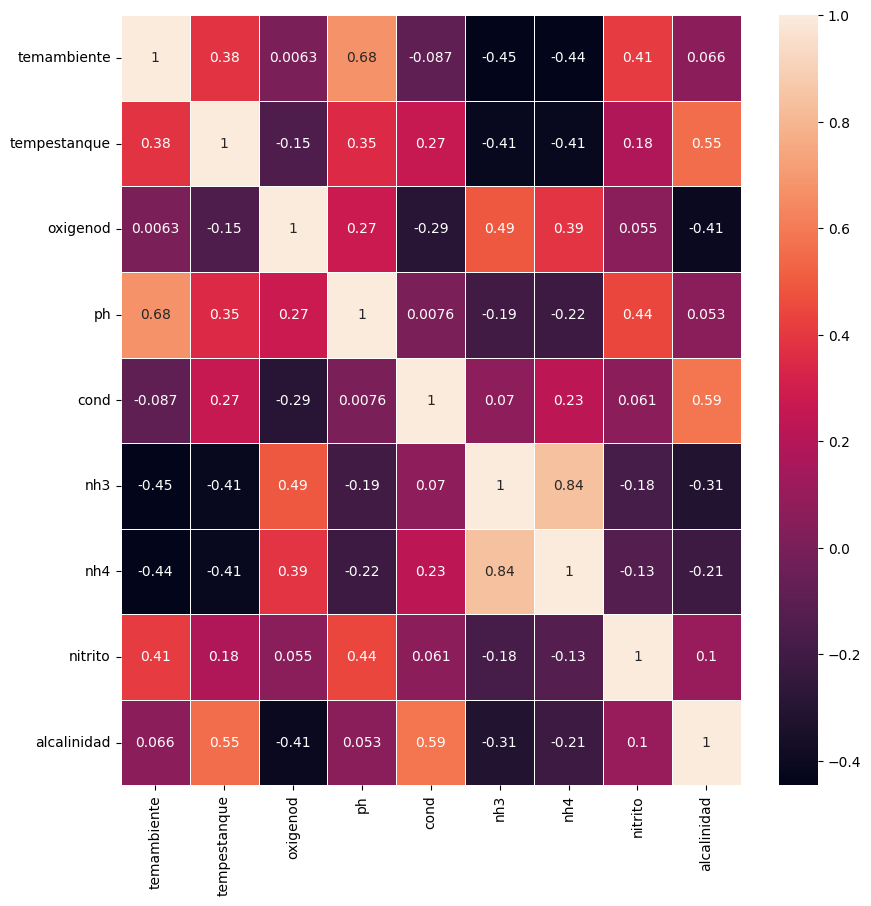

In [ ]:
def DiagCorr(df, tamuno, tamdos):
    f, ax = plt.subplots(figsize=(tamuno,tamdos))
    sns.heatmap(df.corr(method="spearman"), annot=True, linewidths=.5, ax=ax)

DiagCorr(MedNorm, 10,10)

### **19. Correlación Sin Ruido**

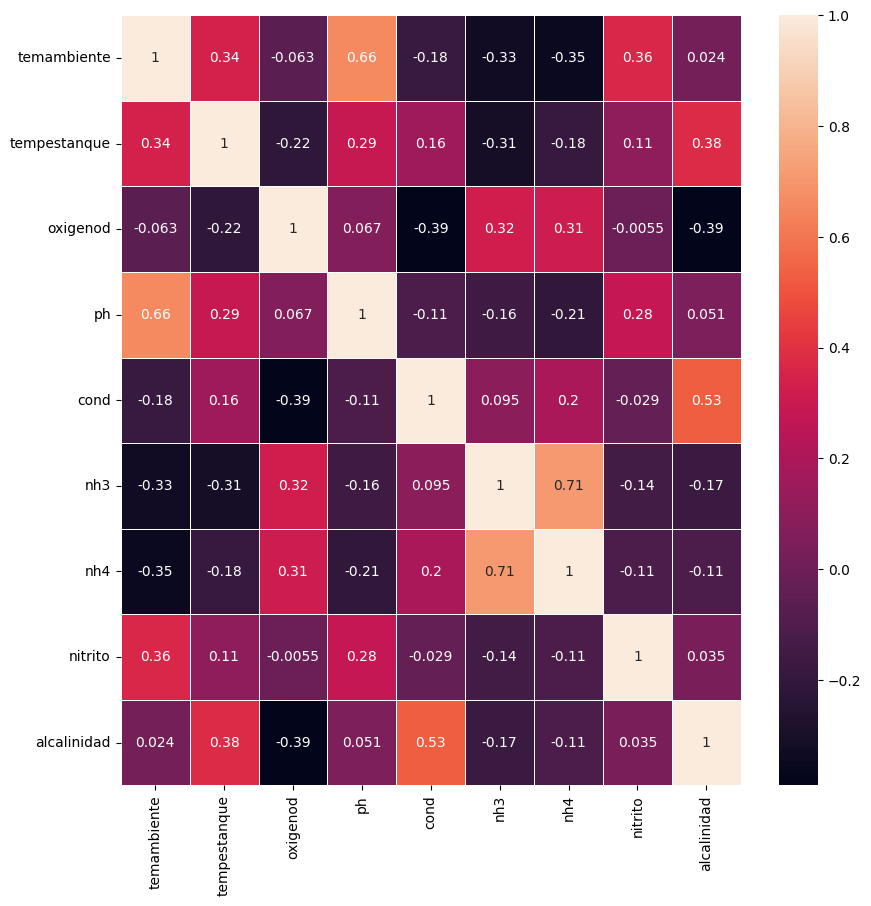

In [ ]:
DiagCorr(MedNorm2, 10,10)

### **20. Primer Modelo Ph-Temperatura 0.68 correlación**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##Seleccionar las variables

X = MedNorm[['temambiente']]
y = MedNorm['ph']

##Particionar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.10, random_state=42)

##crear el modelo
modelouno = LinearRegression()
modelouno.fit(X_train, y_train)

##Predicciones
y_pred = modelouno.predict(X_test)

##Metricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

##Calculo del R^2
r2 = round(r2_score(y_test, y_pred),3)

##Imprimir los resultados
print('Mean Squared Error (MSE)', mse)
print('Root Mean Squared Error (RMSE)', rmse)
print('R^2 Score:', r2)

Mean Squared Error (MSE) 0.00416788518051477
Root Mean Squared Error (RMSE) 0.0645591603145113
R^2 Score: 0.563


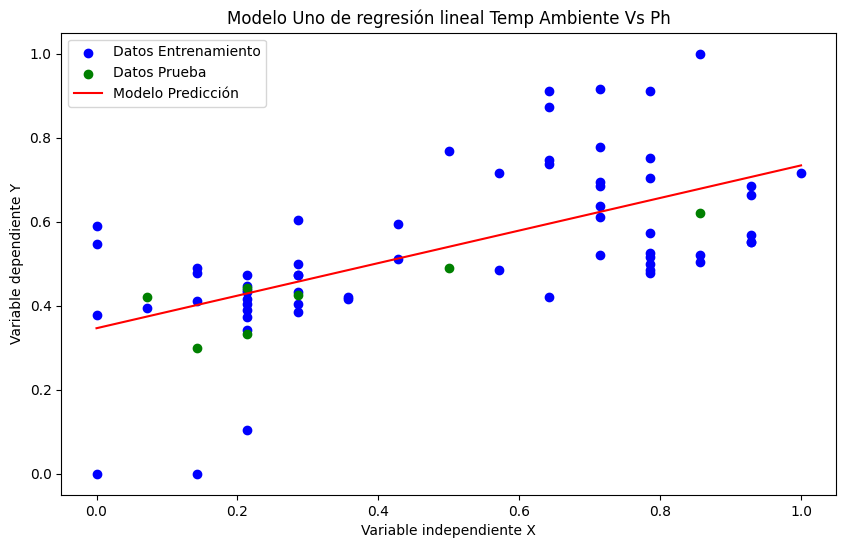

In [ ]:
##Grafica del modelo
X_range = pd.DataFrame(np.linspace(X.min(), X.max(),100))
y_pred = modelouno.predict(X_range)

plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='blue', label='Datos Entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos Prueba')
plt.plot(X_range, y_pred, color='red', label='Modelo Predicción')
plt.title('Modelo Uno de regresión lineal Temp Ambiente Vs Ph')
plt.xlabel('Variable independiente X')
plt.ylabel('Variable dependiente Y')
plt.legend()

### **21. Segundo Modelo regresión con ruido**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##Seleccionar las variables

X = MedNorm2[['temambiente']]
y = MedNorm2['ph']

##Particionar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.10, random_state=42)

##crear el modelo
modelouno = LinearRegression()
modelouno.fit(X_train, y_train)

##Predicciones
y_pred = modelouno.predict(X_test)

##Metricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

##Calculo del R^2
r2 = round(r2_score(y_test, y_pred),3)

##Imprimir los resultados
print('Mean Squared Error (MSE)', mse)
print('Root Mean Squared Error (RMSE)', rmse)
print('R^2 Score:', r2)

Mean Squared Error (MSE) 0.025387561007870492
Root Mean Squared Error (RMSE) 0.15933474513699292
R^2 Score: 0.39


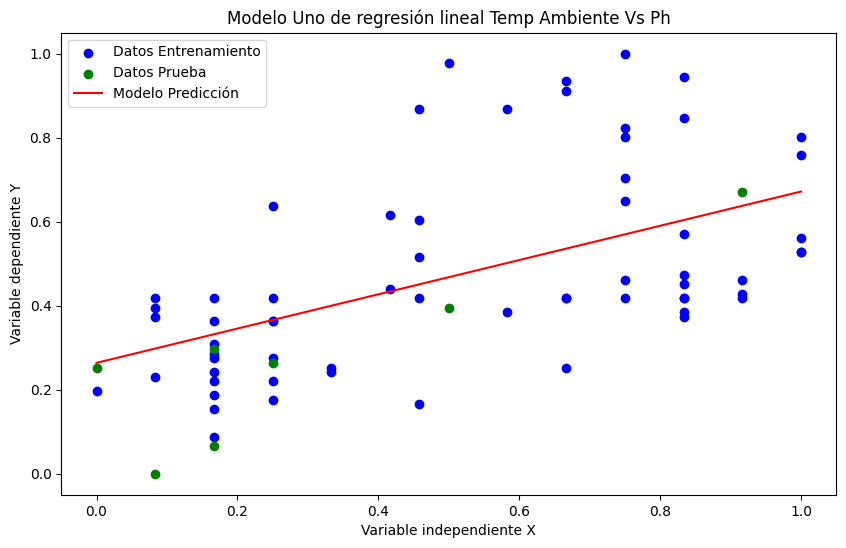

In [ ]:
##Grafica del modelo
X_range = pd.DataFrame(np.linspace(X.min(), X.max(),100))
y_pred = modelouno.predict(X_range)

plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='blue', label='Datos Entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos Prueba')
plt.plot(X_range, y_pred, color='red', label='Modelo Predicción')
plt.title('Modelo Uno de regresión lineal Temp Ambiente Vs Ph')
plt.xlabel('Variable independiente X')
plt.ylabel('Variable dependiente Y')
plt.legend()

In [ ]:
import statsmodels.api as sm

# Definir las variables independientes y la variable dependiente
X = MedNorm[['nh3']]
y = MedNorm['nh4']

# Añadir una constante a las variables independientes para el intercepto
X_with_const = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X_with_const).fit(cov_type='HC3')

# Obtener los valores ajustados (predicciones) y los residuos
fitted_vals = model.fittedvalues
residuals = model.resid

# Mostrar el resumen del modelo (opcional)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    nh4   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     116.1
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           2.38e-16
Time:                        17:06:48   Log-Likelihood:                 33.048
No. Observations:                  70   AIC:                            -62.10
Df Residuals:                      68   BIC:                            -57.60
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0242      0.025      0.971      0.3